In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

DATA CLEANING

In [3]:
df.describe()

,Unnamed: 0
count,103.000000
mean,51.000000
std,29.877528
min,0.000000
25%,25.500000
50%,51.000000
75%,76.500000
max,102.000000


In [4]:
df

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,"28.386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"


Changing the Decimal and Commas to their right position

In [5]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [6]:
df.rename(columns ={ "Production (Tons)":"Production(Tons)"}, inplace = True)
df.rename(columns ={ "Production per Person (Kg)":"Production_per_Person(Kg)"}, inplace = True)
df.rename(columns ={ "Acreage (Hectare)":"Acreage(Hectare)"}, inplace = True)
df.rename(columns ={ "Yield (Kg / Hectare)":"Yield(Kg/Hectare)"}, inplace = True)
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [7]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [8]:
df[df["Yield(Kg/Hectare)"].isnull()]


,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [9]:
df = df.dropna().reset_index()
df.isna().sum()

index                        0
Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             0
Yield(Kg/Hectare)            0
dtype: int64

In [10]:
df.drop(["index","Unnamed: 0"], axis = 1, inplace = True)
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [11]:
df["Production(Tons)"] = df["Production(Tons)"].astype("float")
df["Production_per_Person(Kg)"] = df["Production_per_Person(Kg)"].astype("float")
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype("float")
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype("float")

In [12]:
df.dtypes


Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [13]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

DATA ANALYSIS

UNIVARIATE ANALYSIS

How many countries produce sugarcane from each continent?

In [14]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

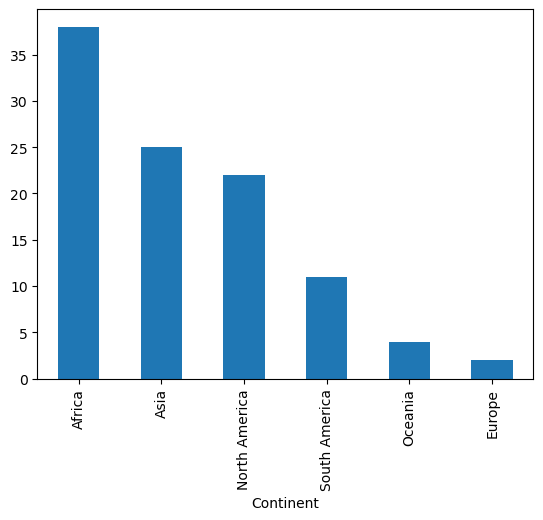

In [15]:
df["Continent"].value_counts().plot(kind='bar')

In [16]:
df.describe()#statistical measurement of each column

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


Checking outliers with the help of boxplot

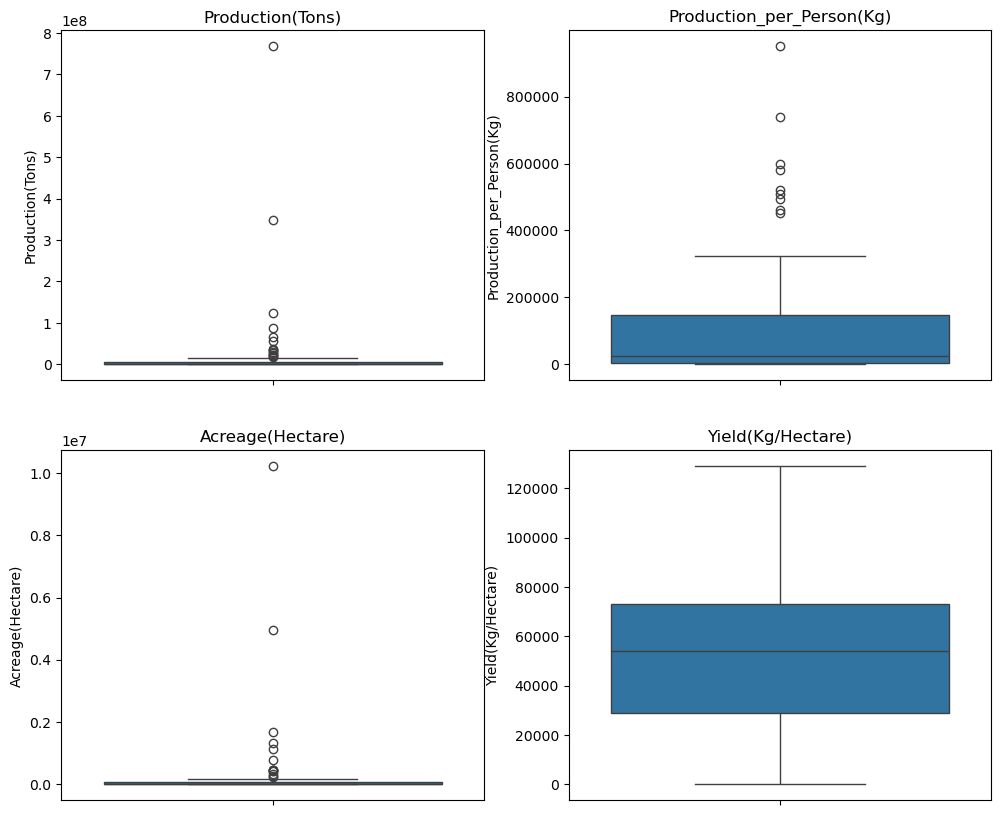

In [17]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person(Kg)"])
plt.title("Production_per_Person(Kg)")
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()

C:\Users\Vinay\AppData\Local\Temp\ipykernel_11336\2288211327.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\Vinay\AppData\Local\Temp\ipykernel_11336\2288211327.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_Person(Kg)"])
C:\Users\Vina

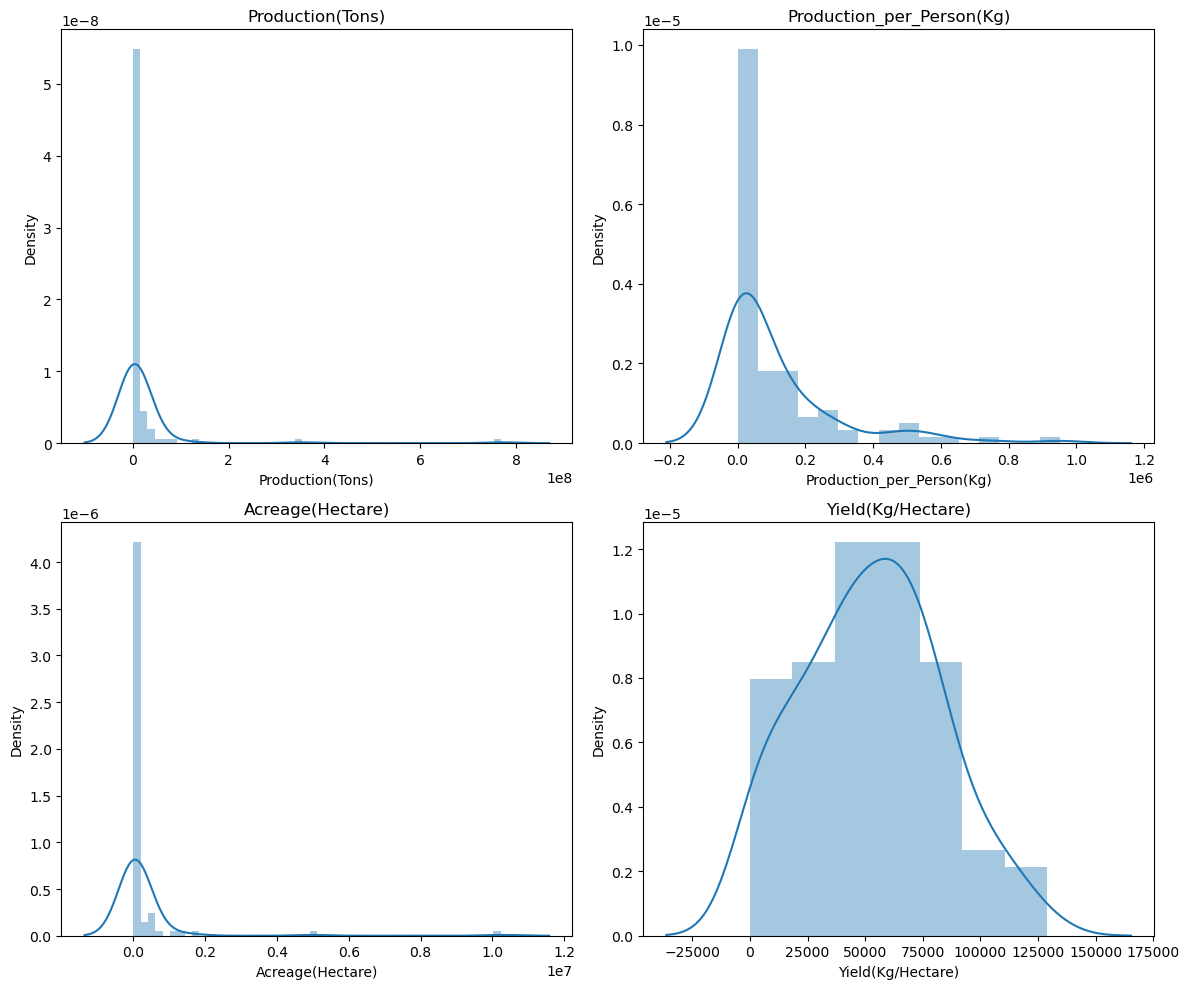

In [18]:
#Distribution of the data columns 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.distplot(df["Production_per_Person(Kg)"])
plt.title("Production_per_Person(Kg)")
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.tight_layout()
plt.show()

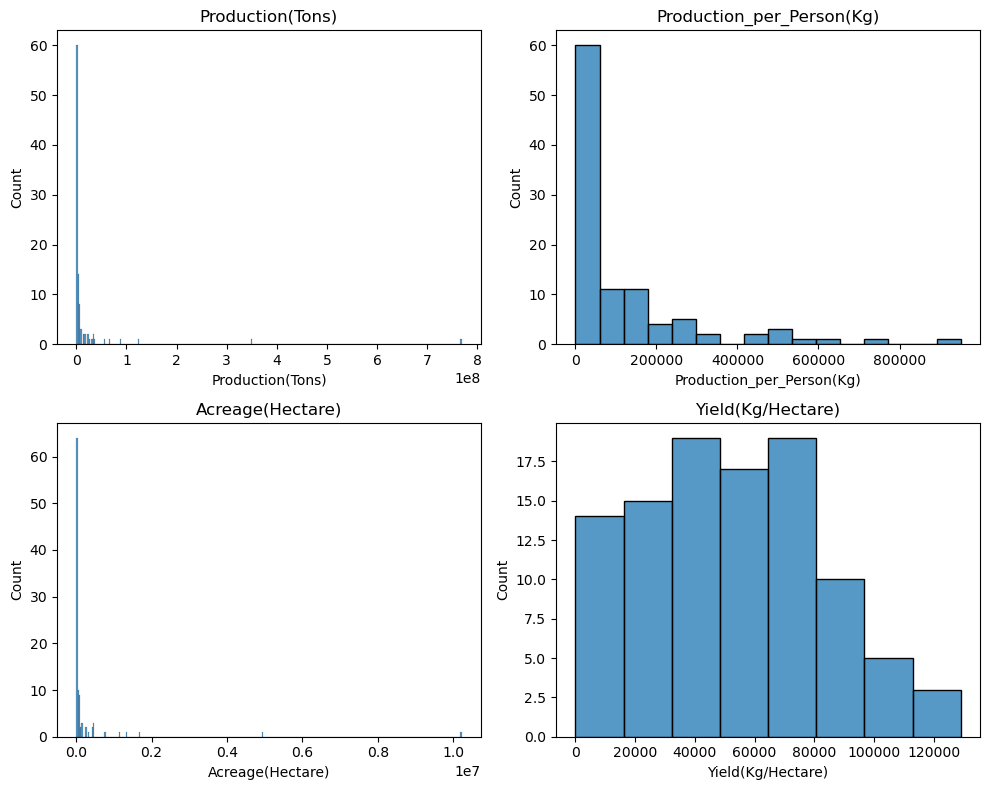

In [19]:
#Histogram of the data columns 
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.histplot(df["Production_per_Person(Kg)"])
plt.title("Production_per_Person(Kg)")
plt.subplot(2,2,3)
sns.histplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.histplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.tight_layout()
plt.show()

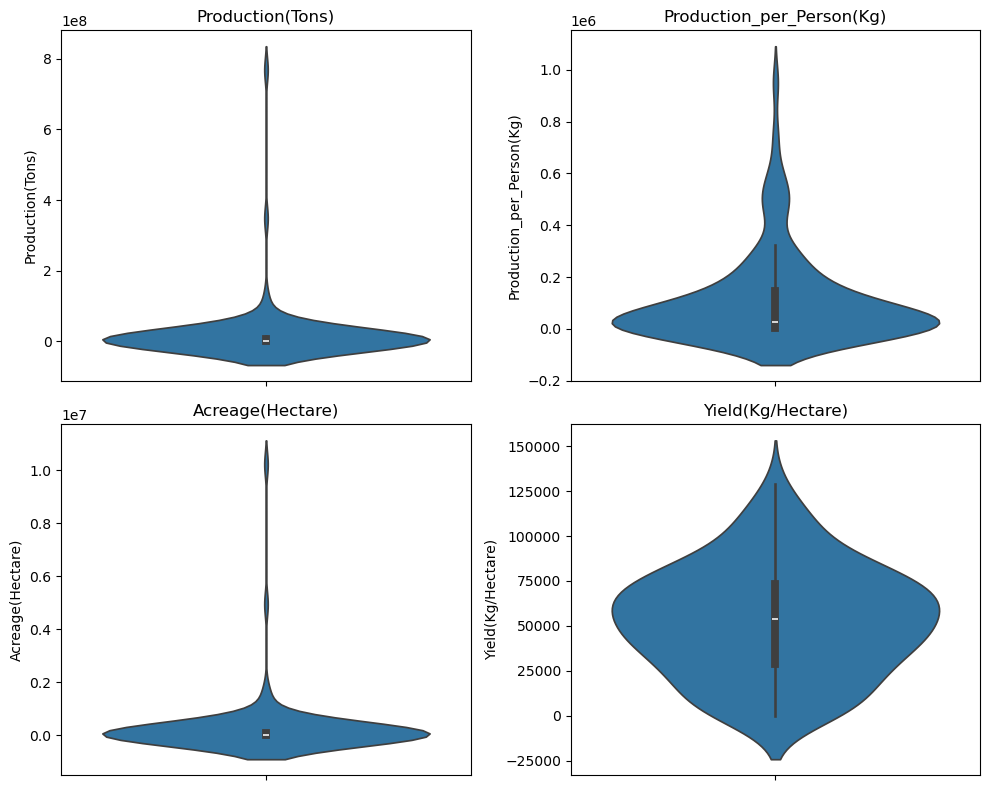

In [20]:
#ViolinPlot
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.violinplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.violinplot(df["Production_per_Person(Kg)"])
plt.title("Production_per_Person(Kg)")
plt.subplot(2,2,3)
sns.violinplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.violinplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.tight_layout()
plt.show()

In [21]:
#Bivariate Analysis

In [22]:
#Which country produces maximum sugarcane?
df_new = df[["Country","Production(Tons)"]].set_index("Country")
df_new["Production(Tons)_percent"] = df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()
df_new.head()

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,40.727285
India,348448000.0,18.462001
China,123059739.0,6.520138
Thailand,87468496.0,4.634389
Pakistan,65450704.0,3.467809


<Axes: ylabel='Production(Tons)_percent'>

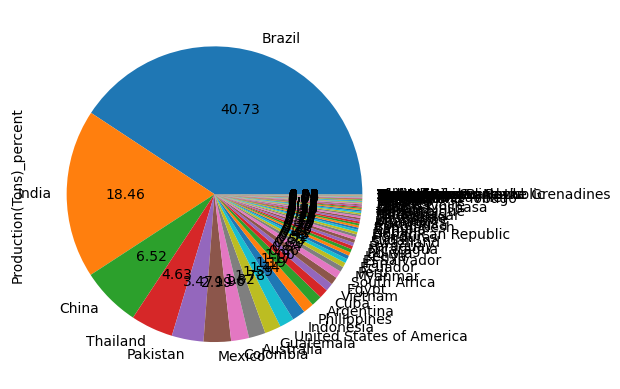

In [23]:
df_new["Production(Tons)_percent"].plot(kind = 'pie',autopct="%.2f")

<Axes: xlabel='Country'>

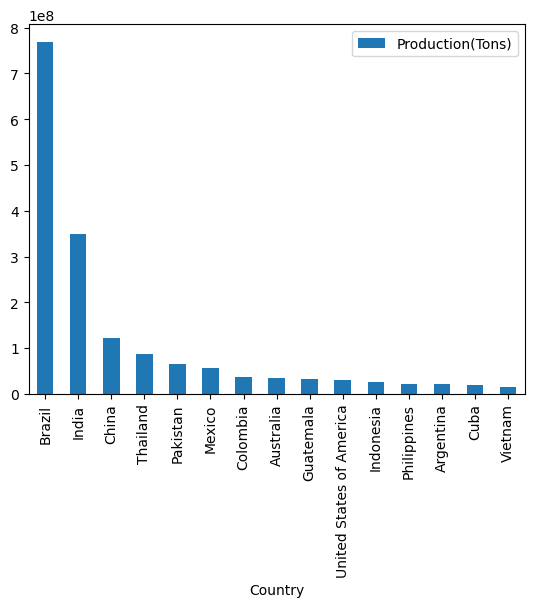

In [24]:
df[["Country","Production(Tons)"]].set_index("Country").sort_values("Production(Tons)", ascending = False).head(15).plot(kind = "bar")


Which country has highest land?

In [25]:
df_acr = df[["Country","Acreage(Hectare)"]].set_index("Country")
df_acr["acr_percent"] = df_acr["Acreage(Hectare)"]*100/df_acr["Acreage(Hectare)"].sum()
df_acr.head()

,Acreage(Hectare),acr_percent
Country,,
Brazil,10226205.0,40.119116
India,4950000.0,19.419680
China,1675215.0,6.572149
Thailand,1336575.0,5.243608
Pakistan,1130820.0,4.436396


<Axes: ylabel='Acreage(Hectare)'>

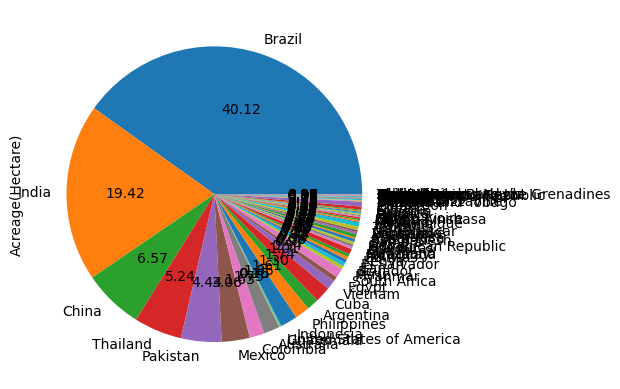

In [26]:
df_acr["Acreage(Hectare)"].plot(kind="pie", autopct="%.2f")

<Axes: xlabel='Country'>

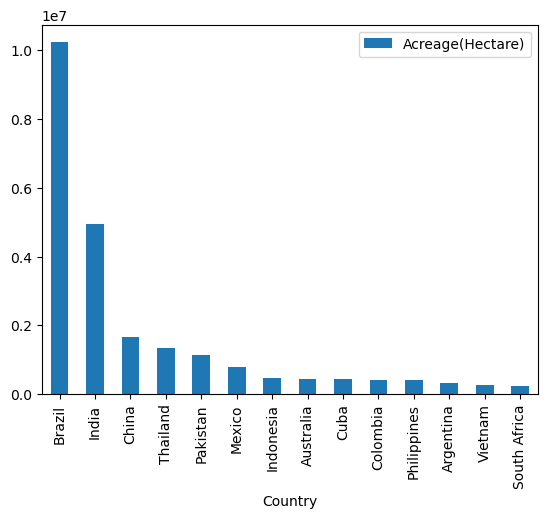

In [27]:
df[["Country","Acreage(Hectare)"]].set_index("Country").sort_values("Acreage(Hectare)",ascending=False).head(14).plot(kind='bar')

Which country has highest yield per hectare?

C:\Users\Vinay\AppData\Local\Temp\ipykernel_11336\3180363526.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


<function matplotlib.pyplot.show(close=None, block=None)>

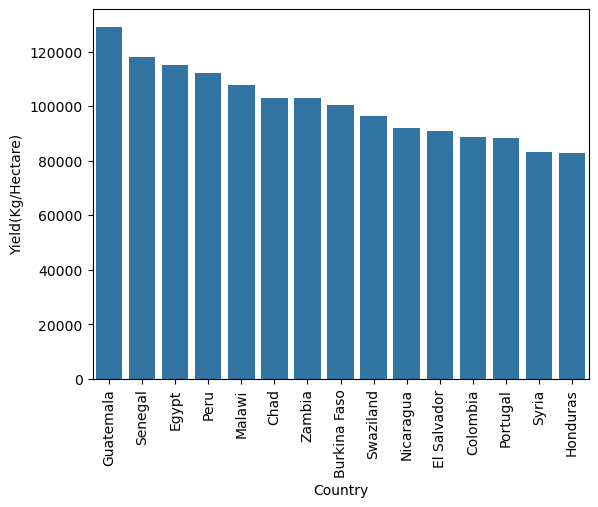

In [28]:
df_y = df.sort_values("Yield(Kg/Hectare)", ascending = False)
ax = sns.barplot(data = df_y.head(15), x="Country",y="Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show

<Axes: ylabel='Yield(Kg/Hectare)'>

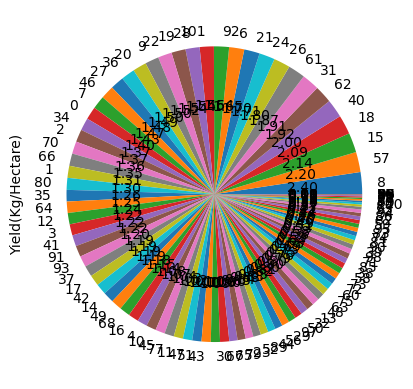

In [29]:
df_y['yeild']=df_y["Yield(Kg/Hectare)"]*100/df_y["Yield(Kg/Hectare)"].sum()
df_y["Yield(Kg/Hectare)"].plot(kind='pie', autopct= '%.2f')

Which country has highest production?

In [30]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


C:\Users\Vinay\AppData\Local\Temp\ipykernel_11336\531600715.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  az.set_xticklabels(ax.get_xticklabels(),rotation =90)


<function matplotlib.pyplot.show(close=None, block=None)>

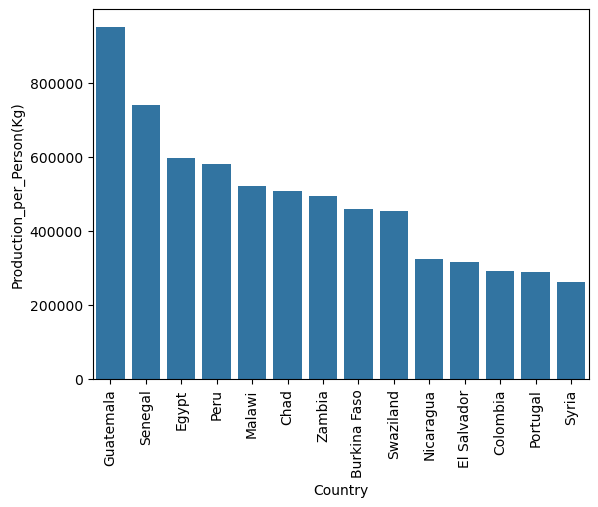

In [31]:
df_prod = df.sort_values('Production_per_Person(Kg)',ascending=False)
az=sns.barplot(data=df_prod.head(14),y="Production_per_Person(Kg)",x='Country')
az.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show

<Axes: ylabel='Production_per_Person(Kg)'>

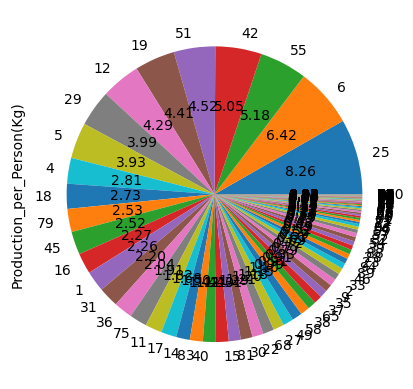

In [32]:
df_prod['pro_percent']=df_prod["Production_per_Person(Kg)"]*100/df_prod["Production_per_Person(Kg)"].sum()
df_prod["Production_per_Person(Kg)"].plot(kind='pie',autopct='%.2f')

In [33]:
df.head()
df.dtypes


Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

Creating the correlation matrix of numerical Dataset

In [34]:
df_num = df.select_dtypes(include="float")
df_num.corr()


,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


HEATMAPS

<Axes: >

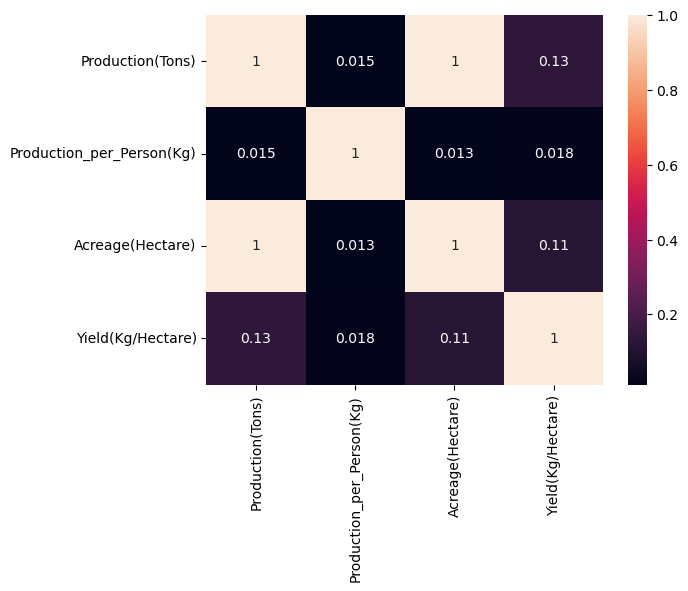

In [35]:
sns.heatmap(df_num.corr(),annot=True)

Do countries with highest land produce more sugarcane?

In [36]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


Overall increase in land increases the production

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

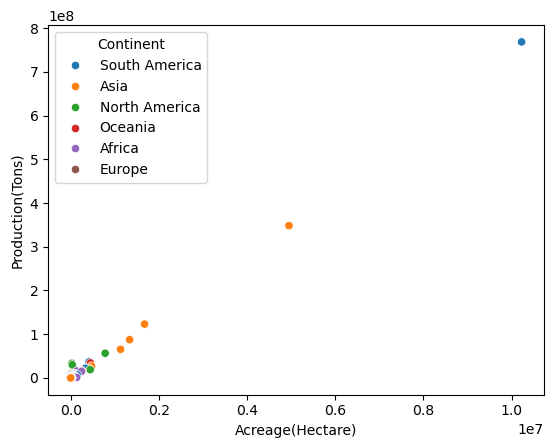

In [37]:
sns.scatterplot(data = df, x= "Acreage(Hectare)",y="Production(Tons)",hue='Continent')

Do countries which yield more sugarcane per hectare produces more sugarcane per person?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production_per_Person(Kg)'>

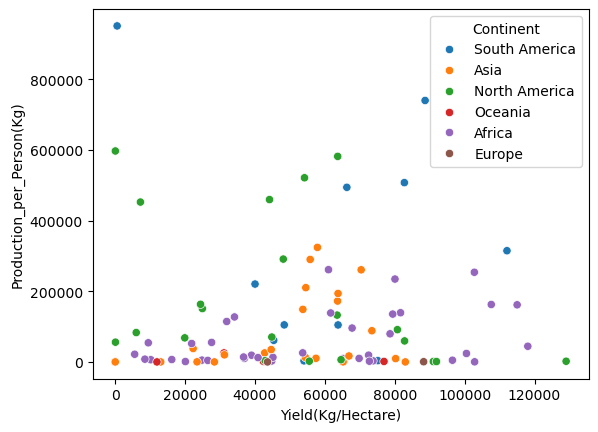

In [38]:
sns.scatterplot(data = df, x= 'Yield(Kg/Hectare)',y='Production_per_Person(Kg)',hue='Continent')

Analysis For Continent

In [39]:
df_continent = df.groupby("Continent").sum()
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


In [40]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


Which continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

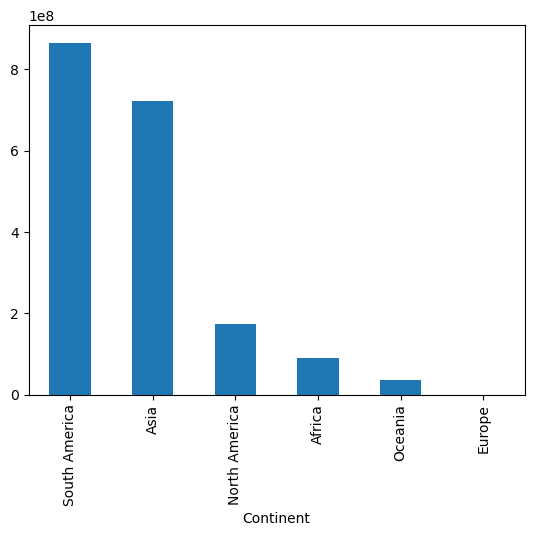

In [41]:
df_continent['Production(Tons)'].sort_values(ascending=False).plot(kind='bar')

Do number of countries in a Continent effects production of sugarcane?

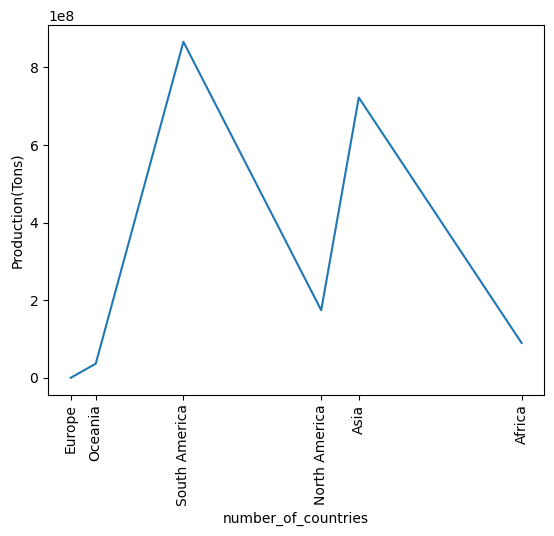

In [42]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()

As we can see Africa with highet number of countries but still low production rates. Hence, number of countries in a Continent doesn't effects production of sugarcane.

Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

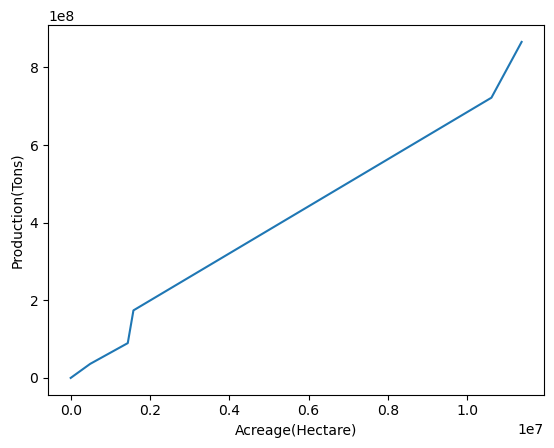

In [43]:
sns.lineplot(data=df_continent,x= 'Acreage(Hectare)',y= "Production(Tons)")

Production distribution by continent

<Axes: ylabel='Production(Tons)'>

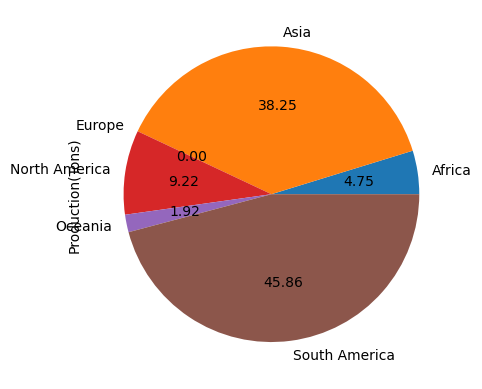

In [44]:
df_continent['Production(Tons)'].plot(kind='pie', autopct= '%.2f')

Correlation for continent

In [45]:
df_continent.select_dtypes(include="float").corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.522211,0.994897,0.091201
Production_per_Person(Kg),0.522211,1.000000,0.463215,0.542961
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000
